In [1]:
# Importing the necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.feature_extraction.text import TfidfVectorizer  # For transforming text to TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer  # For transforming text to count-based features
from sklearn.metrics.pairwise import linear_kernel  # For computing linear kernel (similarity)
from sklearn.metrics.pairwise import cosine_similarity  # For computing cosine similarity
from ast import literal_eval  # For evaluating string literals as Python expressions


In [2]:
#giving file_path to the required files
movies_file_path = 'C:\\Users\\Aravind\\Desktop\\NEW\\theMoviesDataset (2)\\movies_metadata.csv'
credits_file_path = 'C:\\Users\\Aravind\\Desktop\\NEW\\theMoviesDataset (2)\\credits.csv'
keywords_df=pd.read_csv("C:\\Users\\Aravind\\Desktop\\NEW\\theMoviesDataset (2)\\keywords.csv")
#C:\Users\Aravind\Desktop\NEW\theMoviesDataset (2)
#reading required files
movies_df = pd.read_csv(movies_file_path, low_memory=False)#low_memory=False to enure correct datatype inference
credits_df = pd.read_csv(credits_file_path)
#to delete all rows after the first 25000, since the data is large it shows memory error while taking cosine similarity in last step
movies_df = movies_df.iloc[:25000]
print(movies_df.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [3]:
# Display non-integer values in the id column of both movies and credits file
print(movies_df[~movies_df['id'].astype(str).str.isnumeric()])
print(credits_df[~credits_df['id'].astype(str).str.isnumeric()])
# Remove rows with non-integer id values in movies_df and credits_df
movies_df = movies_df[movies_df['id'].astype(str).str.isnumeric()]
credits_df = credits_df[credits_df['id'].astype(str).str.isnumeric()]
# Convert id column to integers 
movies_df['id'] = movies_df['id'].astype(int)
credits_df['id'] = credits_df['id'].astype(int)


                     adult belongs_to_collection  \
19730   - Written by Ørnås              0.065736   

                                 budget  \
19730  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   

                                                homepage          id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...  1997-08-20       0   

      original_language                            original_title  overview  \
19730             104.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

       ... release_date revenue runtime spoken_languages status  tagline  \
19730  ...            1     NaN     NaN              NaN    NaN      NaN   

       title video vote_average vote_count  
19730    NaN   NaN          NaN        NaN  

[1 rows x 24 columns]
Empty DataFrame
Columns: [cast, crew, id]
Index: []


In [4]:
credits_df.columns = ['cast','crew','id']#renamin the names of columns of credits file to cast,crew,id incase the original file had
#extra space in its name or anything that might cause an error
keywords_df['id'] = keywords_df['id'].astype(int)# Convert id column to integers
#merging the three files
movies_df = movies_df.merge(credits_df, on='id')
movies_df = movies_df.merge(keywords_df, on='id')
print(movies_df)

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
25146  False                                                NaN         0   
25147  False                                                NaN  15000000   
25148  False  {'id': 282971, 'name': 'Aashiqui Collection', ...   1300000   
25149  False  {'id': 207632, 'name': 'The ABCs of Death Coll...         0   
25150  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

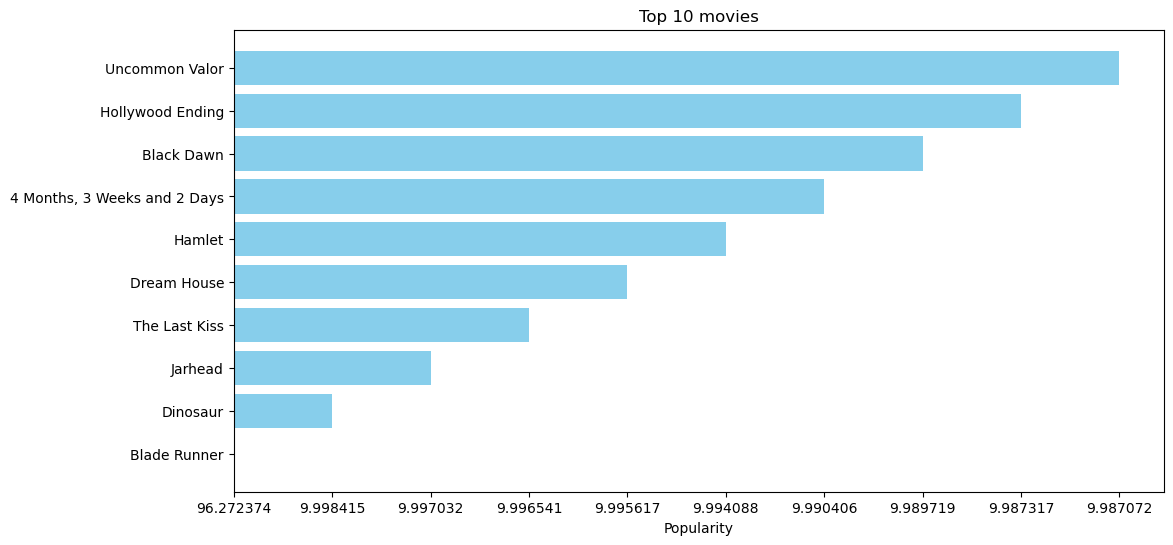

In [6]:
def plot():
    popularity = movies_df.sort_values("popularity", ascending=False)#sorting movies by popularity in descending order
    plt.figure(figsize=(12, 6))#specifying the size of the figure
    #creating a horizontal bar chart with the top 10 most popular movies
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.title("Top 10 movies")#setting the title
    plt.xlabel("Popularity")#setting the label for the x-axis
    plt.show()#displaying the plot
plot()#calling the function


In [7]:
print(movies_df)

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
25146  False                                                NaN         0   
25147  False                                                NaN  15000000   
25148  False  {'id': 282971, 'name': 'Aashiqui Collection', ...   1300000   
25149  False  {'id': 207632, 'name': 'The ABCs of Death Coll...         0   
25150  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

In [8]:
# Function to identify problematic entries
#this function allows us to safely apply literal_eval
def find_invalid_entries(df, feature):
    invalid_entries = []#empty list to store invalid entries
    for index, value in df[feature].items():# iterating through each value in the specified feature column
        try:
            literal_eval(value)
        except (ValueError, SyntaxError):#incase it is value error or syntax error
            invalid_entries.append((index, value))# appending the index and value of the invalid entry to the list
    return invalid_entries# returning the list of invalid entries

# List of features to check for invalid entries
features = ["cast", "crew", "keywords", "genres"]

# Find and print invalid entries for each column in features
for feature in features:
    invalid_entries = find_invalid_entries(movies_df, feature)# finding invalid entries in the current feature
    if invalid_entries:
        print(f"Invalid entries in {feature}: {invalid_entries}")#printing the invalid entries
# Function to safely apply literal_eval
def safe_literal_eval(val):
    try:
        return literal_eval(val)# evaluating the string as a Python literal
    except (ValueError, SyntaxError):#incase it is value error or syntax error
        return val  # handle invalid entries as needed

#To apply safe_literal_eval to each feature column
for feature in features:
    movies_df[feature] = movies_df[feature].apply(safe_literal_eval)

movies_df[features].head(10)#display the first 10 rows of the file
# Function to get the director's name from the crew list
def get_director(x):
    for i in x:
        if i["job"] == "Director":#returning name if job is director
            return i["name"]
    return np.nan # returning NaN if no director is found
# function to get a list of names (up to 3) from the specified feature
def get_list(x):
    if isinstance(x, list):# checking if the input is a list
        names = [i["name"] for i in x] # extracting the name from each dictionary in the list
        if len(names) > 3:#checking if there are more than 3 names
            names = names[:3]# keep only the first 3 names
        return names# return the list of names
    return [] # return an empty list if the input is not a list

# applying the get_director function
movies_df["director"] = movies_df["crew"].apply(get_director)#applying the get_director function to crew column

# List of features to process with get_list
features_to_list = ["cast", "keywords", "genres"]

# applying the get_list function to each feature
for feature in features_to_list:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [9]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()
#To clean data by converting to lowercase and removing spaces
def clean_data(x):
    if isinstance(x, list): # If the input is a list
        return [str.lower(i.replace(" ", "")) for i in x]# convert each element to lowercase and remove spaces
    else:
        if isinstance(x, str):# If the input is a string
            return str.lower(x.replace(" ", ""))# convert to lowercase and remove spaces
        else:# if the input is neither a list nor a string
            return ""# return an empty string
# list of features to clean
features = ['cast', 'keywords', 'director', 'genres']
#to apply the clean_data function to each specified feature column
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)
# function to create a soup of words for each movie by concatenating keywords, cast, director, and genres
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
# applying the create_soup function to each row to create the 'soup' column
movies_df["soup"] = movies_df.apply(create_soup, axis=1)
# printing the first few entries of the soup column to verify the result
print(movies_df["soup"].head())

0    jealousy toy boy tomhanks timallen donrickles ...
1    boardgame disappearance basedonchildren'sbook ...
2    fishing bestfriend duringcreditsstinger walter...
3    basedonnovel interracialrelationship singlemot...
4    baby midlifecrisis confidence stevemartin dian...
Name: soup, dtype: object


In [10]:
#initializing a CountVectorizer with english stop words to transform text data into a count-based feature matrix
count_vectorizer = CountVectorizer(stop_words="english")
# To fit the CountVectorizer to the soup column and transform it into a count matrix
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])
# create a Series with movie titles as index and their corresponding index in the dataframe as values
# This is to quickly find the index of a movie given its title
indices = pd.Series(movies_df.index, index=movies_df['title'])
# computing the cosine similarity matrix on the reduced matrix
# this measures the cosine similarity between each pair of movies based on their soup content
cosine_sim2 = cosine_similarity(count_matrix,count_matrix)


In [16]:
#function to get movie recommendations based on a given title and cosine similarity matrix
def get_recommendations(title, cosine_similarity=cosine_similarity):
    idx = indices[title]# getting the index of the movie that matches the title
    sim_scores = list(enumerate(cosine_similarity[idx]))#getting the pairwise similarity scores of all movies with that movie
    # The similarity scores are in the form of a list of tuples (index, similarity score) 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)# sorting the similarity scores based on the similarity values in descending order
    sim_scores = sim_scores[1:6] #selecting the scores of the 5 most similar movies (excluding the first one which is the movie itself)
    movies_indices = [ind[0] for ind in sim_scores] # getting the indices of the 5 most similar movies
    movies = movies_df["title"].iloc[movies_indices]# getting the titles of the 5 most similar movies
    return movies #returns the titles of the recommended movies
print("Content Based System")
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises", cosine_sim2))# getting and printing recommendations for "The Dark Knight Rises"
print()
print("Recommendations for Toy Story")
print(get_recommendations("Toy Story", cosine_sim2))# getting and printing recommendations for "Toy Story"

Content Based System
Recommendations for The Dark Knight Rises
12565    The Dark Knight
10186      Batman Begins
9291              Shiner
9850     Amongst Friends
7752            Mitchell
Name: title, dtype: object

Recommendations for Toy Story
3020                          Toy Story 2
15481                         Toy Story 3
22080                Toy Story of Terror!
3332                    Creature Comforts
15696    The Bugs Bunny/Road Runner Movie
Name: title, dtype: object
